In [2]:

%load_ext autoreload
%autoreload 2

In [3]:
ANNOTATION_FILE = "simple_baseline_annotations.txt" 
# TODO make generating this part of video_to_frames.py
# CLIP_FRAMES_FOLDER = "/home/rocus/Documents/john/grepl/clip_frames"
CLIP_FRAMES_FOLDER = "/home/rocus/Documents/john/grepl/clip_frames"


Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/61vCFzjBasE_3188_60 seems to have zero RGB frames on disk!


Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/61vCFzjBasE_3188_60 seems to have zero RGB frames on disk!


Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/61vCFzjBasE_3188_60 seems to have zero RGB frames on disk!


Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/61vCFzjBasE_3188_60 seems to have zero RGB frames on disk!


Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/61vCFzjBasE_3188_60 seems to have zero RGB frames on disk!


Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/61vCFzjBasE_3188_60 seems to have zero RGB frames on disk!


Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/61vCFzjBasE_3188_60 seems to have zero RGB frames on disk!


Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/61vCFzjBasE_3188_60 seems to

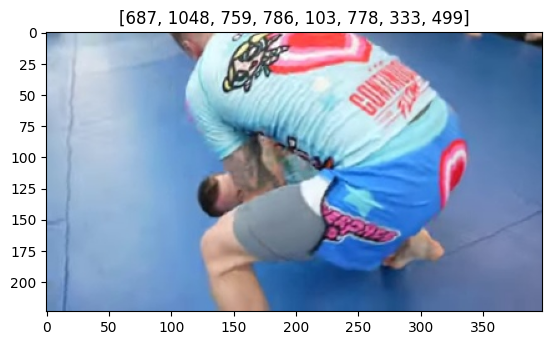

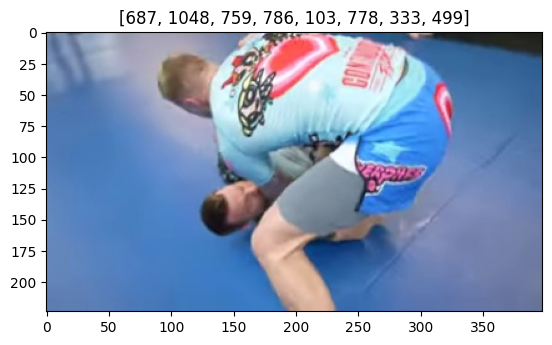

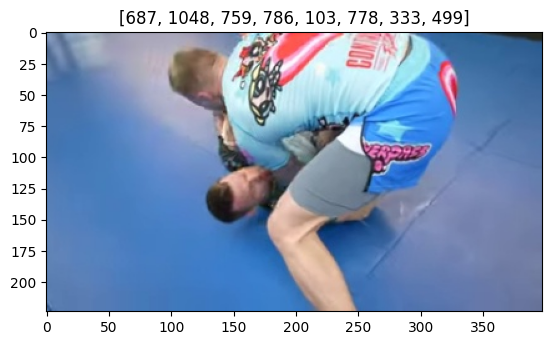

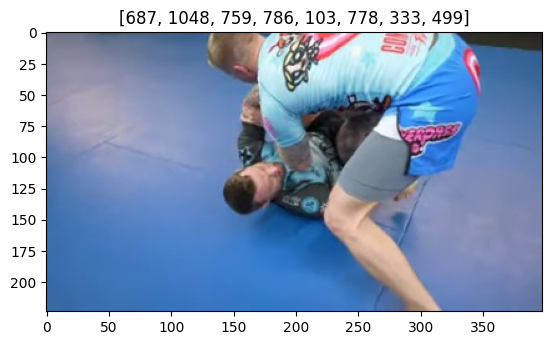

KeyboardInterrupt: 

In [4]:
from grepl.processing.video_dataset import VideoFrameDataset
import matplotlib.pyplot as plt

dataset = VideoFrameDataset(
    root_path=CLIP_FRAMES_FOLDER,
    annotationfile_path=ANNOTATION_FILE,
    num_segments=60,
    frames_per_segment=1,
    transform=None,
    test_mode=False,
    # /home/rocus/Documents/john/grepl/clip_frames/ZIhTULA1X5U_205_60/frame_000000001374.jpg
    # clip_frames/ZXBgdArFqI0_606_60/frame_000000000020.jpg
    # frame_000000000008.jpg
    imagefile_template='frame_{:012d}.jpg'
)

sample = dataset[0]  # take first sample of dataset 
frames = sample[0]   # list of PIL images
label = sample[1]    # integer label

for image in frames[:5]:
    plt.imshow(image)
    plt.title(label)
    plt.show()
    plt.pause(1)


# oh the dataset is fine - it's the construction of the frame dataset

```
Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/-Hc7Mkb8SEI_245_60 seems to have zero RGB frames on disk!

Dataset Warning: video /home/rocus/Documents/john/grepl/clip_frames/5ix4aFb5Xiw_1814_60 seems to have zero RGB frames on disk!
```

In [5]:
from grepl.processing.videos_to_frames import video_to_rgb
import os

video_path = '/home/rocus/Documents/john/grepl/clips/-Hc7Mkb8SEI_245_60.mp4'
OUT_HEIGHT_WIDTH = (398, 224) # approximately 16:9 aspect ratio
video_to_rgb(video_path, CLIP_FRAMES_FOLDER, resize_shape=OUT_HEIGHT_WIDTH)

[av1 @ 0x57198f122d80] Your platform doesn't suppport hardware accelerated AV1 decoding.
[av1 @ 0x57198f122d80] Failed to get pixel format.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Header.
[av1 @ 0x57198f122d80] Missing Sequence Head

In [7]:
import cv2
file_template = 'frame_{0:012d}.jpg'
reader = cv2.VideoCapture(video_path)
success, frame, = reader.read()  # read first frame



[av1 @ 0x57198ec76440] Your platform doesn't suppport hardware accelerated AV1 decoding.
[av1 @ 0x57198ec76440] Failed to get pixel format.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Header.
[av1 @ 0x57198ec76440] Missing Sequence Head

In [8]:
success

False

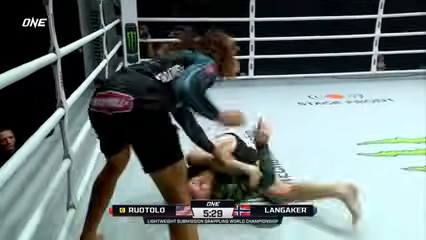

In [10]:
from grepl.processing.video import get_frame_from_timestamp

get_frame_from_timestamp(video_path, timestamp=30)

In [ ]:
import os, subprocess, cv2, av


FILE_TEMPLATE = 'frame_{:012d}.jpg'

def video_to_rgb_fallback(video_filename, out_dir, resize_shape):
    os.makedirs(out_dir, exist_ok=True)

    # --- try OpenCV first ----------------------------------------------------
    cap = cv2.VideoCapture(video_filename)
    ok, frame = cap.read()
    if ok:
        idx = 0
        while ok:
            cv2.imwrite(os.path.join(out_dir, FILE_TEMPLATE.format(idx)),
                        cv2.resize(frame, resize_shape))
            ok, frame = cap.read()
            idx += 1
        cap.release()
        return                      # success, we’re done

    print("OpenCV failed, falling back to PyAV...")
    # --- fallback: PyAV (uses system FFmpeg → AV1 works) ---------------------
    with av.open(video_filename) as container:
        for idx, pkt in enumerate(container.decode(video=0)):
            img = cv2.resize(pkt.to_ndarray(format='bgr24'), resize_shape)
            cv2.imwrite(os.path.join(out_dir, FILE_TEMPLATE.format(idx)), img)
            
    print(f"Extracted {idx + 1} frames from {video_filename} to {out_dir}")
    
video_to_rgb_fallback(video_path, CLIP_FRAMES_FOLDER, resize_shape=OUT_HEIGHT_WIDTH)

[av1 @ 0x57198f1408c0] Your platform doesn't suppport hardware accelerated AV1 decoding.
[av1 @ 0x57198f1408c0] Failed to get pixel format.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Header.
[av1 @ 0x57198f1408c0] Missing Sequence Head

OpenCV failed, falling back to PyAV...


Extracted 1480 frames from /home/rocus/Documents/john/grepl/clips/-Hc7Mkb8SEI_245_60.mp4 to /home/rocus/Documents/john/grepl/clip_frames


In [6]:
# !ls 
# clips/-8rqxVzFR4M_774_60.mp4
# TODO now try with a successful video
successful_video_path = '/home/rocus/Documents/john/grepl/clips/-8rqxVzFR4M_774_60.mp4'
video_to_rgb(successful_video_path, CLIP_FRAMES_FOLDER, resize_shape=OUT_HEIGHT_WIDTH)